In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
import warnings
import scipy
import scipy.stats as scs


%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/AdSmartABdata.csv')

In [4]:
df = data.copy()
df.head()

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0

In [6]:
respond_df = df.query("not (yes == 0 & no == 0)")
respond_df.shape

(1243, 9)

In [11]:
clean_df = respond_df[['auction_id', 'experiment', 'yes', 'no']]
clean_df['awareness'] = 0
clean_df.loc[clean_df['yes'] == 1, 'awareness'] = 1
clean_df.loc[clean_df['yes'] == 0, 'awareness'] = 0
clean_df.drop(columns=['yes', 'no'], inplace=True)
clean_df = clean_df.set_index('auction_id')
clean_df

experiment  awareness
auction_id                                                
0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed          0
008aafdf-deef-4482-8fec-d98e3da054da    exposed          1
00a1384a-5118-4d1b-925b-6cdada50318d    exposed          0
00b6fadb-10bd-49e3-a778-290da82f7a8d    control          1
00ebf4a8-060f-4b99-93ac-c62724399483    control          0
...                                         ...        ...
ffa08ff9-a132-4051-aef5-01a9c79367bc    exposed          1
ffb176df-ecd2-45d3-b05f-05b173a093a7    exposed          1
ffb79718-6f25-4896-b6b3-e58b80a6e147    control          0
ffca1153-c182-4f32-9e90-2a6008417497    control          0
ffdfdc09-48c7-4bfb-80f8-ec1eb633602b    exposed          0

[1243 rows x 2 columns]

In [12]:
summary_df = clean_df.pivot_table( index='experiment', aggfunc='sum')
summary_df['total'] = clean_df.pivot_table( index='experiment', aggfunc='count')
summary_df['rate'] = clean_df.pivot_table( index='experiment')
summary_df['not aware'] = summary_df['total'] - summary_df['awareness']
summary_df = summary_df.reindex(['awareness', 'not aware', 'total', 'rate'], axis=1)
summary_df

awareness  not aware  total      rate
experiment                                       
control           264        322    586  0.450512
exposed           308        349    657  0.468798

In [14]:
exp_rate = summary_df['rate']['exposed']
cont_rate = summary_df['rate']['control']

In [15]:
exp_aware = summary_df['awareness']['exposed']
cont_aware = summary_df['awareness']['control']

In [16]:
exp_total = summary_df['total']['exposed']
cont_total = summary_df['total']['control']

In [17]:
diff = exp_rate - cont_rate

In [18]:
print(f'The difference between conversion rates of the test and control groups is {diff}.')

The difference between conversion rates of the test and control groups is 0.018285619295484168.


<b>`Binomial Distribution`</b>

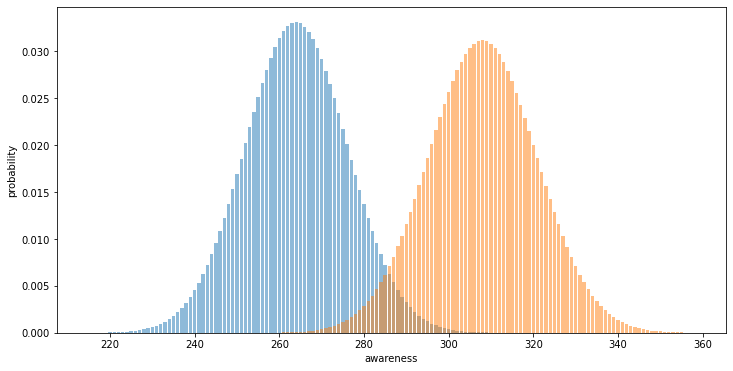

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

xC = np.linspace(cont_aware - 49, cont_aware + 50, 100)
yC = scs.binom(cont_total, cont_rate).pmf(xC)
ax.bar(xC, yC, alpha=0.5, linestyle='--')
xE = np.linspace(exp_aware - 49, exp_aware + 50, 100)
yE = scs.binom(exp_total , exp_rate).pmf(xE)
ax.bar(xE, yE, alpha=0.5, linestyle='--')
plt.xlabel('awareness')
plt.ylabel('probability')
plt.show()